<a href="https://colab.research.google.com/github/RopeFeliz/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [54]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [55]:
import pandas as pd

urls_tiendas = {
    'Tienda1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    'Tienda2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    'Tienda3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv" ,
    'Tienda4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

def analizar_ventas_tiendas(urls_tiendas):

    resultados = []

    for nombre_tienda, url in urls_tiendas.items():
        try:
            # Leer datos de la tienda
            df_tienda = pd.read_csv(url)

            # Calcular ventas totales
            ventas_totales = df_tienda['Precio'].sum()

            # Calcular número de ventas
            num_ventas = len(df_tienda)

            # Calcular venta promedio
            venta_promedio = ventas_totales / num_ventas if num_ventas > 0 else 0

            # Agregar a resultados
            resultados.append({
                'Tienda': nombre_tienda,
                'Ventas_Totales': ventas_totales,
                'Num_Ventas': num_ventas,
                'Venta_Promedio': venta_promedio
            })

            print(f"{nombre_tienda}: Ventas totales = ${ventas_totales:,.2f}")

        except Exception as e:
            print(f"Error procesando {nombre_tienda}: {e}")
            resultados.append({
                'Tienda': nombre_tienda,
                'Ventas_Totales': 0,
                'Num_Ventas': 0,
                'Venta_Promedio': 0,
                'Error': str(e)
            })

    # Crear DataFrame con todos los resultados
    df_resultados = pd.DataFrame(resultados)

    # Ordenar por ventas totales (de mayor a menor)
    df_resultados = df_resultados.sort_values('Ventas_Totales', ascending=False)

    # Añadir ranking
    df_resultados['Ranking'] = range(1, len(df_resultados) + 1)

    # Identificar la tienda con más ventas
    if len(df_resultados) > 0:
        mejor_tienda = df_resultados.iloc[0]
        print(f"\nLA TIENDA CON MÁS VENTAS ES: {mejor_tienda['Tienda']}")
        print(f"   Ventas totales: ${mejor_tienda['Ventas_Totales']:,.2f}")

    return df_resultados

# Ejecutar análisis
df_comparativo = analizar_ventas_tiendas(urls_tiendas)

print("\nDATAFRAME COMPARATIVO COMPLETO:")
print(df_comparativo.to_string(index=False))

Tienda1: Ventas totales = $1,150,880,400.00
Tienda2: Ventas totales = $1,116,343,500.00
Tienda3: Ventas totales = $1,098,019,600.00
Tienda4: Ventas totales = $1,038,375,700.00

LA TIENDA CON MÁS VENTAS ES: Tienda1
   Ventas totales: $1,150,880,400.00

DATAFRAME COMPARATIVO COMPLETO:
 Tienda  Ventas_Totales  Num_Ventas  Venta_Promedio  Ranking
Tienda1    1150880400.0        2359   487867.910131        1
Tienda2    1116343500.0        2359   473227.426876        2
Tienda3    1098019600.0        2359   465459.771089        3
Tienda4    1038375700.0        2358   440362.892282        4


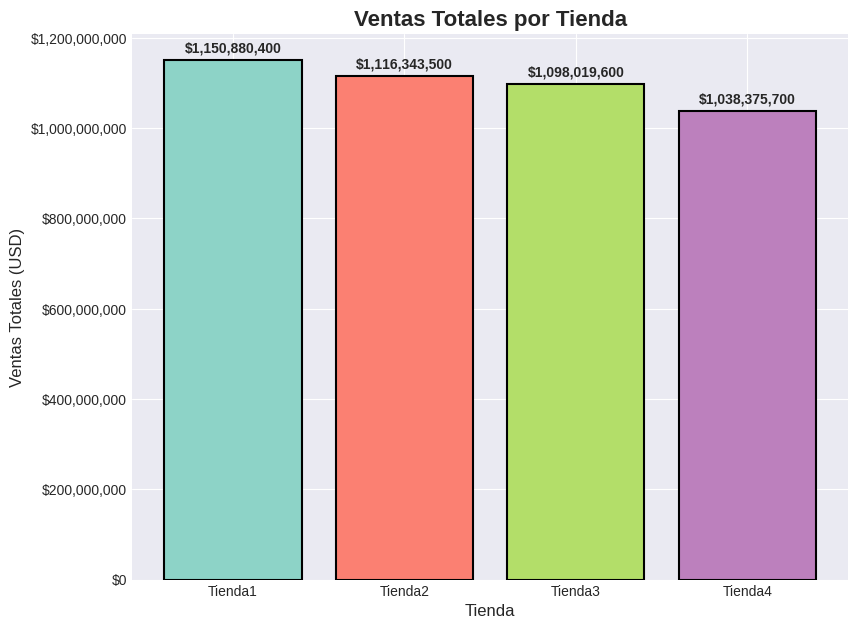

In [56]:
import matplotlib.pyplot as plt
import numpy as np

df_resultados = pd.DataFrame(df_comparativo)
df_resultados = df_resultados.sort_values('Ventas_Totales', ascending=False)

plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(16, 12))

# 1. GRÁFICO DE BARRAS: VENTAS TOTALES POR TIENDA
ax1 = plt.subplot(2, 2, 1)
colores = plt.cm.Set3(np.arange(len(df_resultados)) / len(df_resultados))
barras = ax1.bar(df_resultados['Tienda'], df_resultados['Ventas_Totales'],
                     color=colores, edgecolor='black', linewidth=1.5)
ax1.set_title('Ventas Totales por Tienda', fontsize=16, fontweight='bold')
ax1.set_xlabel('Tienda', fontsize=12)
ax1.set_ylabel('Ventas Totales (USD)', fontsize=12)
ax1.ticklabel_format(style='plain', axis='y')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Añadir etiquetas de valor en las barras
for barra in barras:
    yval = barra.get_height()
    ax1.text(barra.get_x() + barra.get_width()/2, yval + 1e7, f'${yval:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [57]:
import pandas as pd

urls_tiendas = {
    'Tienda1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    'Tienda2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    'Tienda3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv" ,
    'Tienda4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}


In [58]:
def ventas_por_categoria(urls_tiendas):
    resultados = []
    for nombre_tienda, url in urls_tiendas.items():
        try:
            df_tienda = pd.read_csv(url)
            ventas_por_categoria_df = df_tienda.groupby('Categoría del Producto')['Precio'].sum().reset_index()
            ventas_por_categoria_df.rename(columns={'Precio': 'Ventas_Totales'}, inplace=True)
            ventas_por_categoria_df['Tienda'] = nombre_tienda
            resultados.append(ventas_por_categoria_df)
        except Exception as e:
            print(f"Error procesando {nombre_tienda}: {e}")
            resultados.append(pd.DataFrame([{'Tienda': nombre_tienda, 'Categoría del Producto': 'Error', 'Ventas_Totales': 0, 'Error_Detail': str(e)}]))

    if resultados:
        df_final = pd.concat(resultados, ignore_index=True)
        return df_final
    else:
        return pd.DataFrame(columns=['Tienda', 'Categoría del Producto', 'Ventas_Totales'])

df_ventas_por_categoria = ventas_por_categoria(urls_tiendas)

print("\nVENTAS POR CATEGORÍA POR TIENDA:")
print(df_ventas_por_categoria.to_string(index=False))


VENTAS POR CATEGORÍA POR TIENDA:
 Categoría del Producto  Ventas_Totales  Tienda
Artículos para el hogar      12698400.0 Tienda1
   Deportes y diversión      39290000.0 Tienda1
      Electrodomésticos     363685200.0 Tienda1
           Electrónicos     429493500.0 Tienda1
 Instrumentos musicales      91299000.0 Tienda1
               Juguetes      17995700.0 Tienda1
                 Libros       8784900.0 Tienda1
                Muebles     187633700.0 Tienda1
Artículos para el hogar      14746900.0 Tienda2
   Deportes y diversión      34744500.0 Tienda2
      Electrodomésticos     348567800.0 Tienda2
           Electrónicos     410831100.0 Tienda2
 Instrumentos musicales     104990300.0 Tienda2
               Juguetes      15945400.0 Tienda2
                 Libros      10091200.0 Tienda2
                Muebles     176426300.0 Tienda2
Artículos para el hogar      15060000.0 Tienda3
   Deportes y diversión      35593100.0 Tienda3
      Electrodomésticos     329237900.0 Tienda3
      

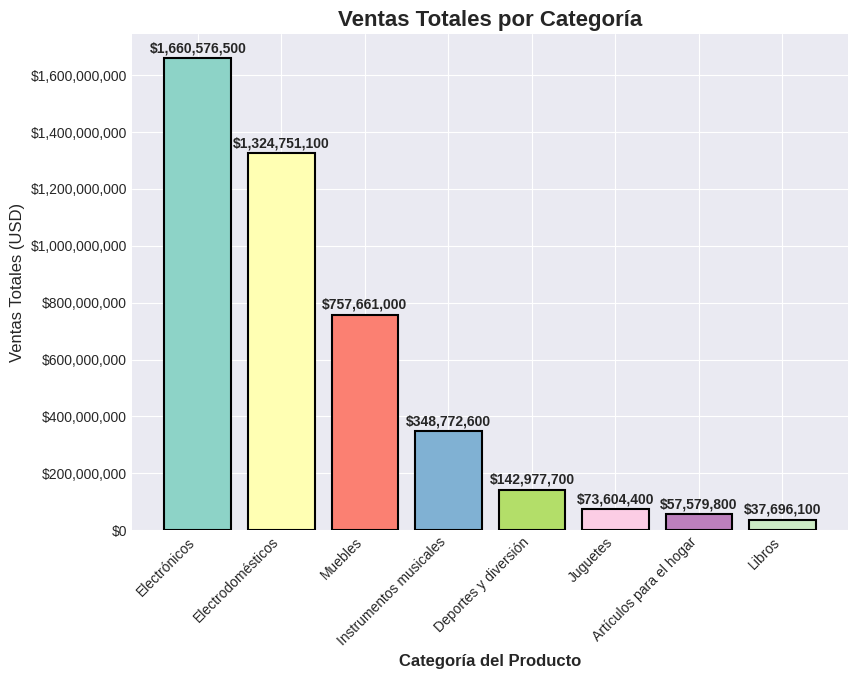

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_ventas_agregadas_por_categoria = df_ventas_por_categoria.groupby('Categoría del Producto')['Ventas_Totales'].sum().reset_index()
df_ventas_agregadas_por_categoria = df_ventas_agregadas_por_categoria.sort_values('Ventas_Totales', ascending=False)

plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(16, 12))

ax1 = plt.subplot(2, 2, 1)

colores = plt.cm.Set3(np.arange(len(df_ventas_agregadas_por_categoria)) / len(df_ventas_agregadas_por_categoria))
barras = ax1.bar(df_ventas_agregadas_por_categoria['Categoría del Producto'], df_ventas_agregadas_por_categoria['Ventas_Totales'],
                     color=colores, edgecolor='black', linewidth=1.5)
ax1.set_title('Ventas Totales por Categoría', fontsize=16, fontweight='bold')
ax1.set_xlabel('Categoría del Producto', fontsize=12, fontweight='bold')
ax1.set_ylabel('Ventas Totales (USD)', fontsize=12)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.xticks(rotation=45, ha='right')

for barra in barras:
    yval = barra.get_height()
    ax1.text(barra.get_x() + barra.get_width()/2, yval + 1e7, f'${yval:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [60]:
def calificacion_promedio_tiendas(urls_tiendas):
    resultados = []

    for nombre_tienda, url in urls_tiendas.items():
        try:
            df_tienda = pd.read_csv(url)
            calificacion_promedio = df_tienda['Calificación'].mean()

            resultados.append({
                'Tienda': nombre_tienda,
                'Calificacion_Promedio': calificacion_promedio
            })

        except Exception as e:
            print(f"Error procesando {nombre_tienda}: {e}")
            resultados.append({
                'Tienda': nombre_tienda,
                'Calificacion_Promedio': None,
                'Error': str(e)
            })

    df_calificaciones = pd.DataFrame(resultados)
    df_calificaciones = df_calificaciones.sort_values(by='Calificacion_Promedio', ascending=False)

    return df_calificaciones

df_calificaciones_tiendas = calificacion_promedio_tiendas(urls_tiendas)

print("\nCALIFICACIÓN PROMEDIO POR TIENDA:")
print(df_calificaciones_tiendas.to_string(index=False))



CALIFICACIÓN PROMEDIO POR TIENDA:
 Tienda  Calificacion_Promedio
Tienda3               4.048326
Tienda2               4.037304
Tienda4               3.995759
Tienda1               3.976685


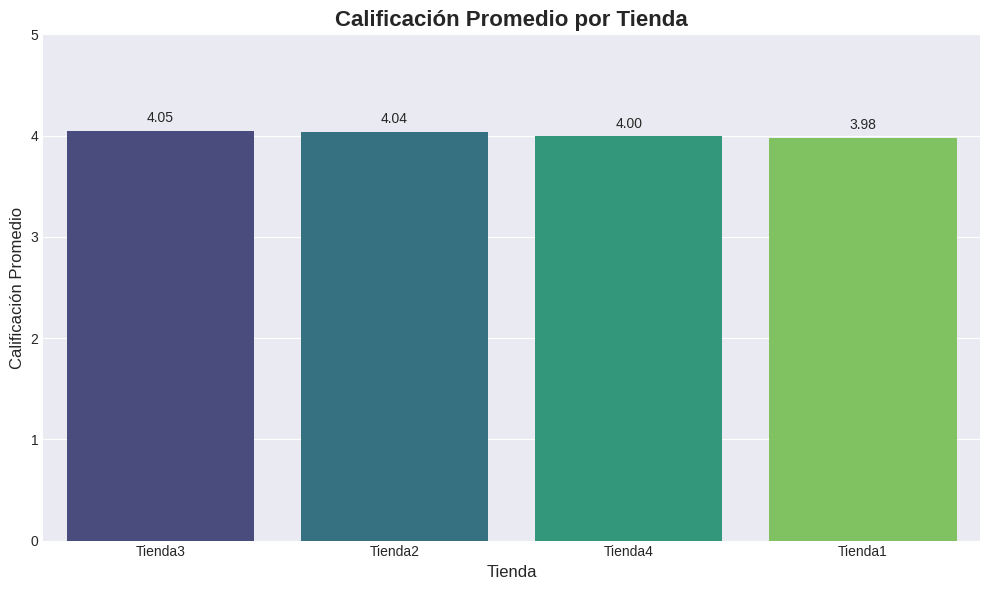

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='Tienda', y='Calificacion_Promedio', data=df_calificaciones_tiendas, palette='viridis', hue='Tienda', legend=False, ax=ax)

ax.set_title('Calificación Promedio por Tienda', fontsize=16, fontweight='bold')
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Calificación Promedio', fontsize=12)
ax.set_ylim(0, 5)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [62]:
import pandas as pd

def analizar_productos_vendidos(urls_tiendas):
    all_data = []
    for nombre_tienda, url in urls_tiendas.items():
        try:
            df_tienda = pd.read_csv(url)
            all_data.append(df_tienda)
        except Exception as e:
            print(f"Error procesando {nombre_tienda}: {e}")

    if not all_data:
        print("No se pudieron cargar datos de ninguna tienda.")
        return pd.DataFrame(), pd.DataFrame()

    df_completo = pd.concat(all_data, ignore_index=True)

    # Calcular ventas totales por producto
    ventas_por_producto = df_completo.groupby('Producto')['Precio'].sum().reset_index()
    ventas_por_producto = ventas_por_producto.sort_values(by='Precio', ascending=False)

    # Productos más vendidos (Top 5)
    productos_mas_vendidos = ventas_por_producto.head(5)

    # Productos menos vendidos (Bottom 5)
    productos_menos_vendidos = ventas_por_producto.tail(5)

    return productos_mas_vendidos, productos_menos_vendidos

# Ejecutar el análisis
productos_mas_vendidos, productos_menos_vendidos = analizar_productos_vendidos(urls_tiendas)

print("\nTOP 5 PRODUCTOS MÁS VENDIDOS (por valor de venta):")
print(productos_mas_vendidos.to_string(index=False))

print("\nTOP 5 PRODUCTOS MENOS VENDIDOS (por valor de venta):")
print(productos_menos_vendidos.to_string(index=False))


TOP 5 PRODUCTOS MÁS VENDIDOS (por valor de venta):
        Producto      Precio
   TV LED UHD 4K 432489600.0
       Iphone 15 401051200.0
    Refrigerador 384937400.0
        Smart TV 290221800.0
Lavadora de ropa 242468600.0

TOP 5 PRODUCTOS MENOS VENDIDOS (por valor de venta):
          Producto    Precio
      Set de vasos 5584200.0
 Ajedrez de madera 5149100.0
    Dinosaurio Rex 3112900.0
Cuerda para saltar 3068300.0
   Cubo mágico 8x8 2729300.0


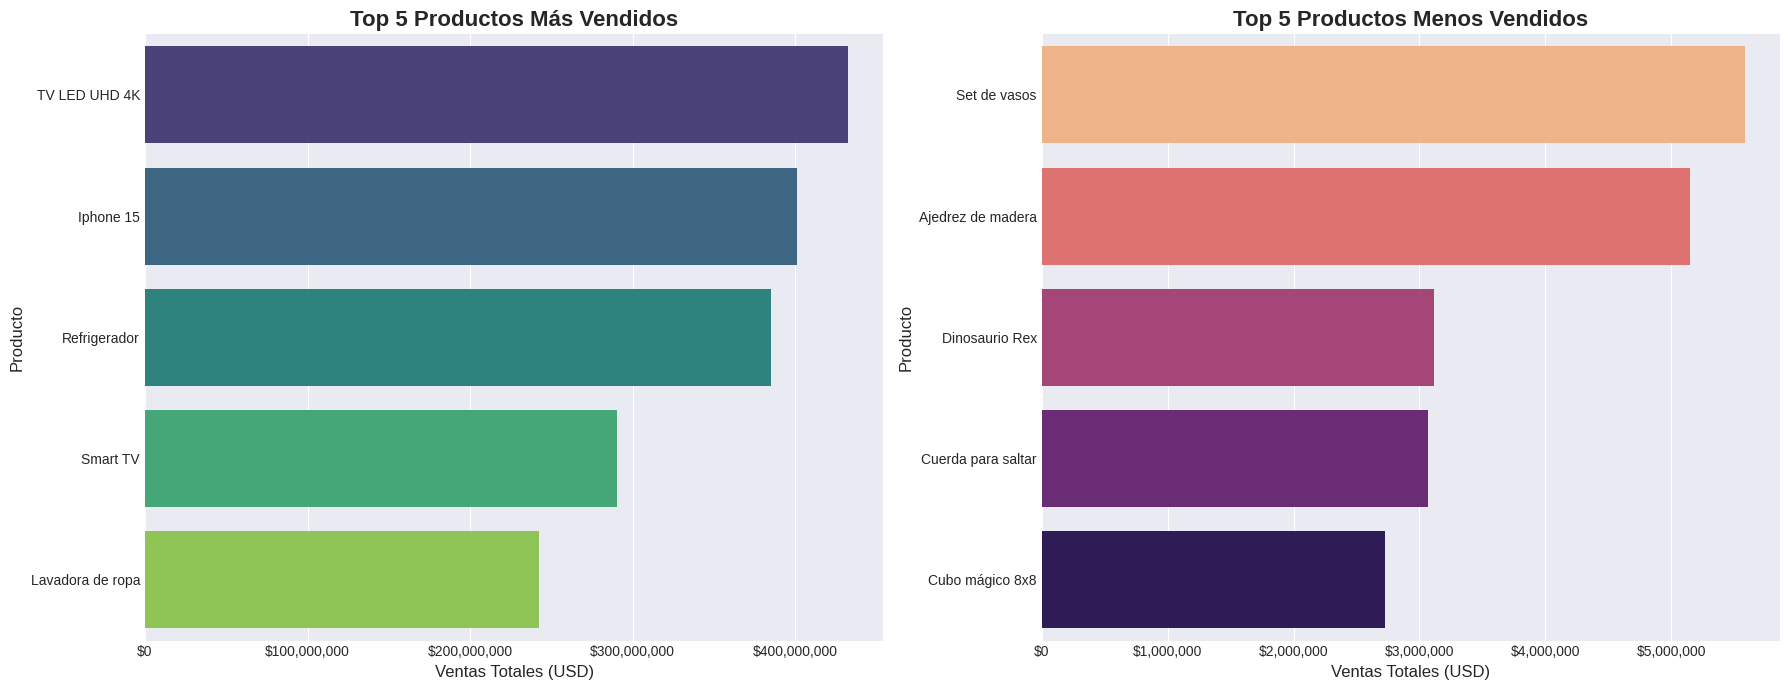

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico de productos más vendidos
sns.barplot(x='Precio', y='Producto', data=productos_mas_vendidos, palette='viridis', hue='Producto', legend=False, ax=axes[0])
axes[0].set_title('Top 5 Productos Más Vendidos', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Ventas Totales (USD)', fontsize=12)
axes[0].set_ylabel('Producto', fontsize=12)
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Gráfico de productos menos vendidos
sns.barplot(x='Precio', y='Producto', data=productos_menos_vendidos, palette='magma_r', hue='Producto', legend=False, ax=axes[1])
axes[1].set_title('Top 5 Productos Menos Vendidos', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Ventas Totales (USD)', fontsize=12)
axes[1].set_ylabel('Producto', fontsize=12)
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [69]:
def envio_promedio_tiendas(urls_tiendas):
    resultados = []
    for nombre_tienda, url in urls_tiendas.items():
        try:
            df_tienda = pd.read_csv(url)

            envio_promedio = df_tienda['Costo de envío'].mean()
            resultados.append({
                'Tienda': nombre_tienda,
                'Envío_Promedio': envio_promedio
            })
        except Exception as e:
            print(f"Error procesando {nombre_tienda}: {e}")
            resultados.append({
                'Tienda': nombre_tienda,
                'Envío_Promedio': None,
                'Error': str(e)
            })

    df_envio_promedio_tiendas = pd.DataFrame(resultados)
    df_envio_promedio_tiendas = df_envio_promedio_tiendas.sort_values(by='Envío_Promedio', ascending=False)

    return df_envio_promedio_tiendas

df_envio_promedio = envio_promedio_tiendas(urls_tiendas)

print("\nENVÍO PROMEDIO POR TIENDA:")
print(df_envio_promedio.to_string(index=False))



ENVÍO PROMEDIO POR TIENDA:
 Tienda  Envío_Promedio
Tienda1    26018.609580
Tienda2    25216.235693
Tienda3    24805.680373
Tienda4    23459.457167


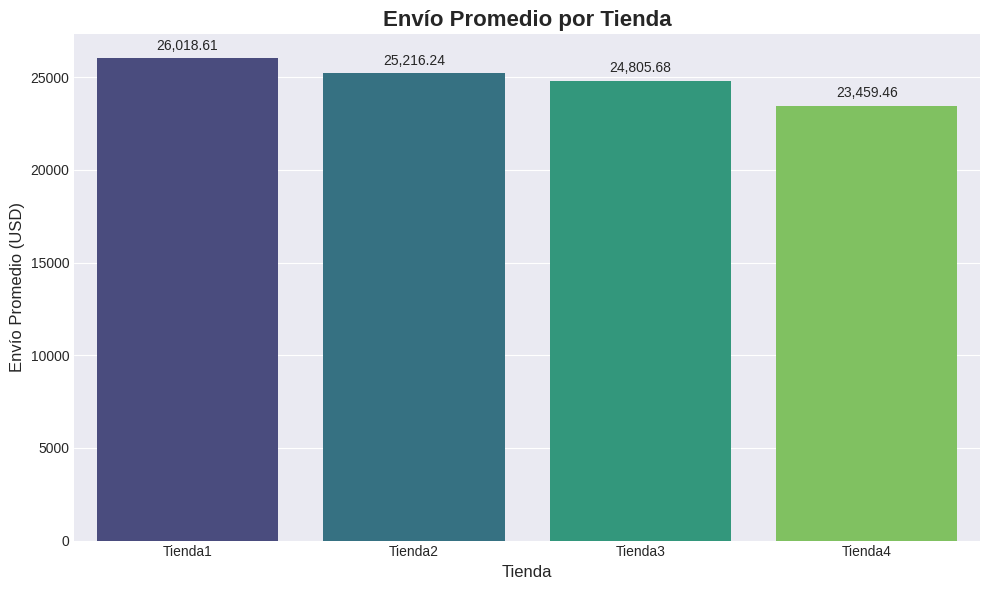

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))

suns = sns.barplot(x='Tienda', y='Envío_Promedio', data=df_envio_promedio, palette='viridis', hue='Tienda', legend=False, ax=ax)
ax.set_title('Envío Promedio por Tienda', fontsize=16, fontweight='bold')
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Envío Promedio (USD)', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()